In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Task I : Merge the 12 months of sales data into a single csv file


In [36]:
path = r'C:\Users\xobed\OneDrive\Desktop\Data analysis projects and problem solving\project1_Finance Problem\Data_set'
data_list = os.listdir(path)


In [31]:
df = pd.read_csv(
    r'C:\Users\xobed\OneDrive\Desktop\Data analysis projects and problem solving\project1_Finance Problem\Data_set\Sales_April_2019.csv')
for i in data_list:
    if i == 'Sales_April_2019.csv':
        pass
    else:
        df2 = pd.read_csv(path + '\\' + i)
        df = pd.concat([df, df2])


In [32]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Task 2 : what was the best month for sales ? how much was earned that month ?


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Handeling missing values


In [40]:
df.isna().sum() / len(df) * 100


Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [41]:
df.dropna(axis=0, inplace=True)


In [42]:
df.isna().sum() / len(df) * 100


Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

### Convert data types


In [56]:
df[~df['Order Date'].str.contains('/')]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [58]:
df = df[~df['Order Date'].str.contains('Order Date')]


In [61]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\131899085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date']= pd.to_datetime(df['Order Date'] )


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [64]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [72]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])


C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\2900351017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\2900351017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'])


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [74]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [78]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month


C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\4122445643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Order Date'].dt.year
C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\4122445643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].dt.month


In [79]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4


### End Convert data types


In [84]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']


C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\1983597858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


In [85]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99


In [90]:
sales = df.groupby('month')['Sales'].sum().sort_values(ascending=False)


In [91]:
sales


month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Sales, dtype: float64

<Axes: xlabel='month'>

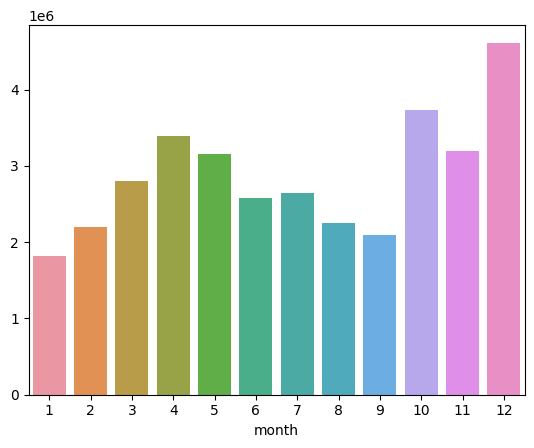

In [99]:
sns.barplot(y=sales.values, x=sales.index)

### The best month for sales = 12

### you earned about 4613443$ that month


# Task 3 : what city had the highest number of sales ?


In [100]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99


In [103]:
df['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [151]:
df['City'] = df['Purchase Address'].str.split(
    ',').str[1] + ' ' + df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\1227712750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].str.split(',').str[1] + ' ' + df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


In [152]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA


In [153]:
df['City'].value_counts()

 San Francisco CA    44732
 Los Angeles CA      29605
 New York City NY    24876
 Boston MA           19934
 Atlanta GA          14881
 Dallas TX           14820
 Seattle WA          14732
 Portland OR         10010
 Austin TX            9905
 Portland ME          2455
Name: City, dtype: int64

In [157]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

In [158]:
city_sales

City
 San Francisco CA    8262203.91
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Boston MA           3661642.01
 Atlanta GA          2795498.58
 Dallas TX           2767975.40
 Seattle WA          2747755.48
 Portland OR         1870732.34
 Austin TX           1819581.75
 Portland ME          449758.27
Name: Sales, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' San Francisco CA'),
  Text(1, 0, ' Los Angeles CA'),
  Text(2, 0, ' New York City NY'),
  Text(3, 0, ' Boston MA'),
  Text(4, 0, ' Atlanta GA'),
  Text(5, 0, ' Dallas TX'),
  Text(6, 0, ' Seattle WA'),
  Text(7, 0, ' Portland OR'),
  Text(8, 0, ' Austin TX'),
  Text(9, 0, ' Portland ME')])

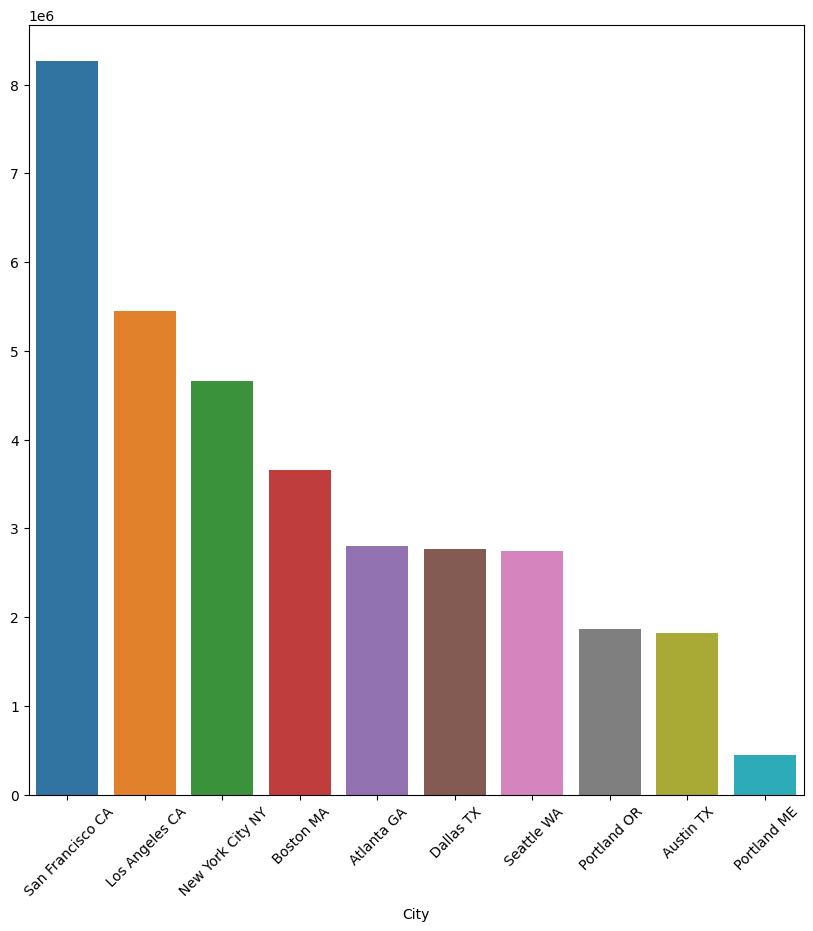

In [159]:
plt.figure(figsize=(10, 10))
sns.barplot(x=city_sales.index, y=city_sales.values)
plt.xticks(rotation=45)


### The city has the highest number of sales is San Francisco $8262203.91


# Task 4 : what time should we display advertisements to maximize of customer's buying product ?


In [160]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA


In [179]:
df.apply(lambda row: row['Order Date'].hour +
         1 if row['Order Date'].minute >= 30 else row['Order Date'].hour, axis=1)


0         9
2        23
3        15
4        15
5         9
         ..
11681    21
11682    16
11683     8
11684    18
11685     0
Length: 185950, dtype: int64

In [180]:
df['order_time'] = df.apply(lambda row: row['Order Date'].hour +
                            1 if row['Order Date'].minute >= 30 else row['Order Date'].hour, axis=1)


C:\Users\xobed\AppData\Local\Temp\ipykernel_7884\3384618212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_time'] =df.apply(lambda row: row['Order Date'].hour + 1 if row['Order Date'].minute >= 30 else row['Order Date'].hour , axis=1)


In [181]:
df['order_time']

0         9
2        23
3        15
4        15
5         9
         ..
11681    21
11682    16
11683     8
11684    18
11685     0
Name: order_time, Length: 185950, dtype: int64

In [197]:
best_time = df.groupby('order_time')[
    'Sales'].sum().sort_values(ascending=False)


In [198]:
best_time

order_time
19    2382895.76
20    2355198.82
13    2310276.92
12    2304206.28
21    2174775.94
18    2151889.14
11    2130357.78
14    2080217.07
15    2006144.97
17    1999191.41
16    1920068.17
22    1833799.49
10    1825392.40
9     1406202.95
23    1375762.23
8      953042.97
7      601949.91
1      571830.12
24     548958.40
0      405639.40
2      343777.55
6      320547.58
5      183464.01
3      170936.36
4      135510.34
Name: Sales, dtype: float64

In [207]:
best_time.values

array([2382895.76, 2355198.82, 2310276.92, 2304206.28, 2174775.94,
       2151889.14, 2130357.78, 2080217.07, 2006144.97, 1999191.41,
       1920068.17, 1833799.49, 1825392.4 , 1406202.95, 1375762.23,
        953042.97,  601949.91,  571830.12,  548958.4 ,  405639.4 ,
        343777.55,  320547.58,  183464.01,  170936.36,  135510.34])

<Axes: xlabel='order_time'>

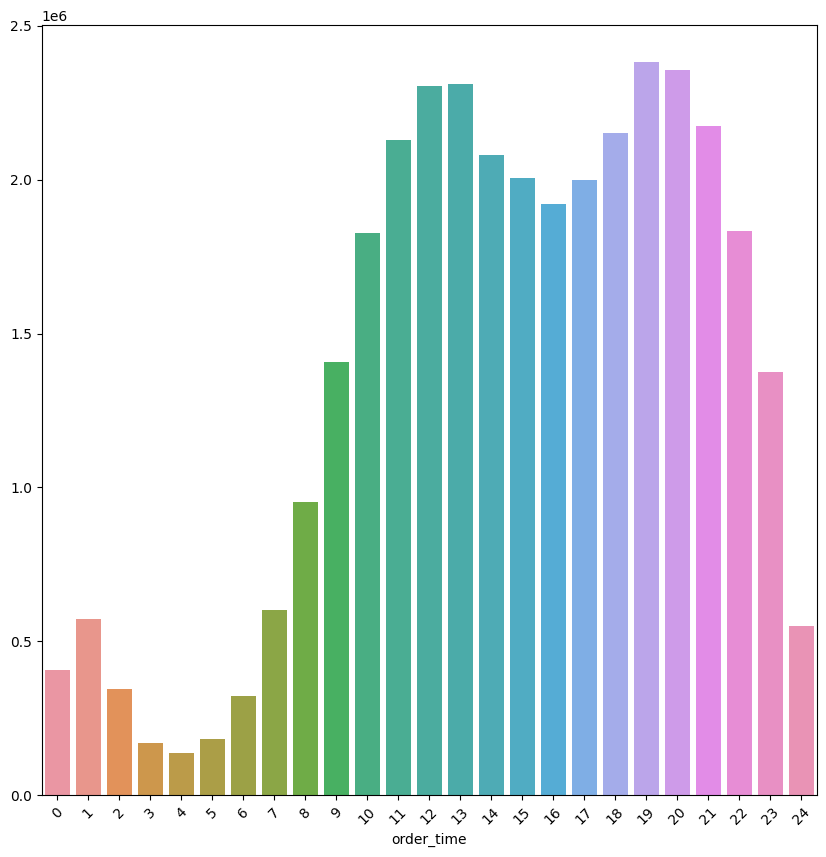

In [206]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
sns.barplot(x=best_time.index, y=best_time.values)


# Task 5 : What products are most often sold together ?


In [213]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales,City,order_time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX,9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA,23
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,15
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,9


In [215]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [238]:
dup_order = df[df['Order ID'].duplicated(keep=False)]

In [239]:
dup_order.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales,City,order_time
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,15
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,20
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",2019,4,11.95,Los Angeles CA,20
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",2019,4,99.99,Boston MA,12


In [254]:
items = dup_order.groupby('Order ID')['Product'].apply(
    lambda x: ','.join(x)).reset_index()

In [256]:
items = pd.DataFrame(items)

In [273]:
items


,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones"
7134,319596,"iPhone,Lightning Charging Cable"


In [267]:
items[items['Product'] == 'iPhone,Lightning Charging Cable']

,Order ID,Product
10,141738,"iPhone,Lightning Charging Cable"
27,142010,"iPhone,Lightning Charging Cable"
33,142085,"iPhone,Lightning Charging Cable"
48,142389,"iPhone,Lightning Charging Cable"
53,142569,"iPhone,Lightning Charging Cable"
...,...,...
7093,318453,"iPhone,Lightning Charging Cable"
7104,318704,"iPhone,Lightning Charging Cable"
7113,318965,"iPhone,Lightning Charging Cable"
7119,319266,"iPhone,Lightning Charging Cable"


In [270]:
items[items['Product'] == 'Lightning Charging Cable,iPhone']

,Order ID,Product
1330,174213,"Lightning Charging Cable,iPhone"
2318,198054,"Lightning Charging Cable,iPhone"
3865,236602,"Lightning Charging Cable,iPhone"
3977,239742,"Lightning Charging Cable,iPhone"
5254,272057,"Lightning Charging Cable,iPhone"
5492,277679,"Lightning Charging Cable,iPhone"
6165,294640,"Lightning Charging Cable,iPhone"
6317,298483,"Lightning Charging Cable,iPhone"
6549,304252,"Lightning Charging Cable,iPhone"


In [275]:
items['Sorted_Items'] = items['Product'].apply(
    lambda x: ','.join(sorted(x.split(','))))

In [276]:
items


,Order ID,Product,Sorted_Items
0,141275,"USB-C Charging Cable,Wired Headphones","USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)","AA Batteries (4-pack),Apple Airpods Headphones"
2,141365,"Vareebadd Phone,Wired Headphones","Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable","Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones","Bose SoundSport Headphones,Google Phone"
...,...,...,...
7131,319536,"Macbook Pro Laptop,Wired Headphones","Macbook Pro Laptop,Wired Headphones"
7132,319556,"Google Phone,Wired Headphones","Google Phone,Wired Headphones"
7133,319584,"iPhone,Wired Headphones","Wired Headphones,iPhone"
7134,319596,"iPhone,Lightning Charging Cable","Lightning Charging Cable,iPhone"


In [277]:
items['Sorted_Items'].value_counts()

Lightning Charging Cable,iPhone                                                891
Google Phone,USB-C Charging Cable                                              868
Wired Headphones,iPhone                                                        374
USB-C Charging Cable,Vareebadd Phone                                           318
Google Phone,Wired Headphones                                                  311
                                                                              ... 
34in Ultrawide Monitor,LG Washing Machine                                        1
Flatscreen TV,LG Dryer                                                           1
iPhone,iPhone                                                                    1
LG Dryer,Wired Headphones                                                        1
Apple Airpods Headphones,Google Phone,USB-C Charging Cable,Wired Headphones      1
Name: Sorted_Items, Length: 227, dtype: int64

### The most 2 product sold together are iPhone and Lightning Charging Cable


# Task 6 : what product sold the most ? why do you think it sold the most ?


In [258]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,Sales,City,order_time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX,9
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA,23
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,15
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,15
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,9


In [259]:
df['Product'].value_counts()


USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

The product that sold the most appears to be the "USB-C Charging Cable" with a total of 21,903 units sold.

There could be several reasons why the "USB-C Charging Cable" sold the most:

1. **Compatibility**: USB-C Charging Cables are versatile and compatible with a wide range of devices, including smartphones, tablets, laptops, and even some accessories. This broad compatibility may have contributed to higher sales.

2. **Necessity**: Charging cables are essential accessories for electronic devices. Many people require multiple charging cables for their devices, which could drive up sales.

3. **Affordability**: Charging cables are relatively inexpensive compared to other electronic accessories, making them an affordable and frequently replaced item. This could lead to higher sales volume.

4. **Replacement Market**: People often need to replace charging cables due to wear and tear, damage, or loss. This constant need for replacements can drive consistent sales.

5. **Promotions and Bundles**: The product may have been bundled with other popular products or featured in promotions, which can boost sales. For example, it might have been included as an accessory in smartphone or laptop bundles.

6. **Brand Reputation**: The brand reputation and quality of the USB-C Charging Cable could also play a role. If customers trust the brand for producing reliable and durable cables, it may lead to higher sales.

7. **Market Trends**: At the time of the data collection, USB-C technology was becoming more prevalent, and many new devices were adopting it. This trend could have driven increased sales of USB-C cables.

It's important to note that a combination of factors, including marketing strategies, pricing, and market demand, could influence the sales of a particular product. Further analysis of sales data, customer feedback, and market trends would provide a more comprehensive understanding of why this product sold the most.
